# Introduction to Regression & Classification in Python

# Part 0: Data Preparation

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler, StandardScaler

In [2]:
## Load the data (this dataset has already been cleaned)
listings = pd.read_csv("listings.csv")

listings.head(5)

,host_listings_count,accommodates,bathrooms,bedrooms,beds,square_feet,price,guests_included,minimum_nights,maximum_nights,...,amenity_Other_pets,amenity_Washer___Dryer,amenity_Smoking_Allowed,amenity_Suitable_for_Events,amenity_Wheelchair_Accessible,amenity_Elevator_in_Building,amenity_Pool,amenity_Doorman,amenity_Paid_Parking_Off_Premises,amenity_Free_Parking_on_Street
0,1.0,4.0,1.5,2.0,3.0,858.464286,250.0,1.0,2.0,1125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,2.0,1.0,1.0,1.0,858.464286,65.0,0.0,2.0,15.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,2.0,1.0,1.0,1.0,858.464286,65.0,1.0,3.0,45.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,4.0,1.0,1.0,2.0,858.464286,75.0,2.0,1.0,1125.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,2.0,1.5,1.0,2.0,858.464286,79.0,1.0,2.0,31.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Part 1: Regression

We're going to start by solving a regression problem.

**Inputs**

Regression is a supervised learning problem, which means that we have access to a dataset $\mathcal{D} = \{ (x_i, y_i) \}_{i = 1}^{n}$ where each $x_i \in \mathbb{R}^d$ and each $y_i \in \mathbb{R}$.

Note that for regression, the output, $y$, is **continuous**. If the output is discrete, such as whether or not an apartment listing will be rented (yes/no), we would use a *classification* algorithm. We will consider this in part 2.
 
**Aim**

The aim of a regression task is to find a function $h: \mathbb{R}^d \to \mathbb{R}$ which allows us to compute an accurate prediction of the output, $y$, for any given input, $x$. These new $x$ and $y$ are *unseen*: that is, we assume they are identically distributed relative to the points in $\mathcal{D}$, but independent.

Exactly what we mean by *accuracy* will be discussed when we talk about model evaluation.

The way we approach the problem of finding $h$ is by selecting a class of models, and solving an optimization problem to find the best model within this class according to a *loss function*. We usually repeat this process for several model classes.

### Defining our Regression Task

We're going to use the Airbnb dataset, where each entry is a property listing, and aim to use the input variables available to us in order to predict the price of a listing.

Note here that we haven't specified exactly which variables in the dataset will be used to define each $x_i$. This choice of **feature space** is part of the modeling process, and we will experiment with it.

### Ordinary Least Squares

The class of models we're going to try is linear models. This means we hypothesise that the output, $y$, can be described **using a linear combination of the inputs**, $x$: $h(x) = \beta^{\intercal} x$.

#### Fitting an OLS Model 

Now, we need to choose exactly which inputs will be used for fitting the model. 

For a very simple model, let's just choose `accommodates` as the only input. To fit this model we will use linear regression in scikit-learn:

In [3]:
X = listings[["accommodates"]]
y = listings["price"]

# Select the model type
model = LinearRegression()

# Fit the model to our data
model.fit(X, y)

,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


We've trained our first model. Let's look at the model output.

In [4]:
print(model.coef_)
print(model.intercept_)

[36.50114555]
62.91548396784988


Let's look at the 'coefficients' section. We see that the point estimates for the model coefficients say that the price estimate is \$62.91 + \$36.50 * (# of people accommodated). 

To visualise the model, let's plot the fitted line.

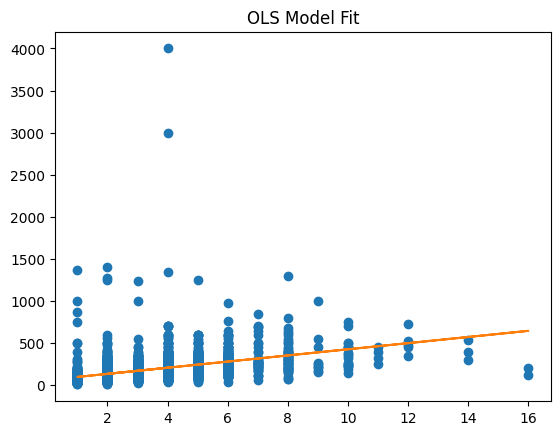

In [5]:
# Start with a scatterplot of the data
plt.plot(X, y, "o")

# Add in the regression line
y_pred = model.predict(X)
plt.plot(X, y_pred)
plt.title("OLS Model Fit")
plt.show()


### Evaluation

Now we're going to look at two measures of accuracy for regression models -- in other words, how well a model explains a dataset.

The first is the mean squared error (MSE), which is simply computed as the mean of the squared residuals (how far an observed data points lies from the predicted linear regression line).

In [6]:
resid = y - y_pred
mse = np.mean(resid**2)
mse

np.float64(17780.93017999928)

We can also calculate the RMSE (the square root of MSE) from a model applied to a dataset:

In [7]:
rmse = np.sqrt(np.mean(resid**2))
rmse

np.float64(133.3451543176552)

Scikit-learn has built-in evaluation functions that can do this for you.

In [8]:
mse = metrics.mean_squared_error(y, y_pred)
rmse = metrics.mean_squared_error(y, y_pred) ** (1 / 2)

print(f"MSE = {mse:.2f}")
print(f"RMSE = {rmse:.2f}")

MSE = 17780.93
RMSE = 133.35


We can also use the 'R squared' coefficient, which is more interepretable since it is on a standardized scale.

'R squared' (R2) is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.  It is defined as:

$R^2 =1- \frac{SS_{res}}{SS_{tot}} = 1 - \frac{\sum_{i}(y_i-\hat{y}_i)^2}{\sum_{i}(y_i-\bar{y})^2}$

Intuitively, R2 measures how accurate our model predictions are in comparison to a baseline model which
predicts the mean of y from the training set.

In [9]:
def r_squared(y_true, y_pred, y_mean):
    ss_res = ((y_true - y_pred) ** 2).sum()
    ss_tot = ((y_true - y_mean) ** 2).sum()
    return 1 - (ss_res / ss_tot)

r2 = r_squared(y, y_pred, np.mean(y))
print(f"R^2 = {r2:.2f}")

R^2 = 0.19


The R squared value is what we will use to evaluate the performance of our models in this session. But, it's important to note that this is definitely not the only choice we could have made! Check out scikit-learn's full library of [evaluation metrics](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.metrics) to see what else is out there.

#### Training, Validation and Testing Splits

Recall that our ultimate goal in this supervised learning task is to be able to predict price ($y$) from an **unseen** set of inputs ($x$, although we are still playing around with the input variables which define it).

When building the OLS model, we used the entire dataset. Simply taking the R squared value on this dataset as a measure of performance is clearly not fair -- since we want the model to generalise to unseen data.

To address this problem, we often split the dataset into three different chunks:

1. **Training data**: the data we build our models on.
2. **Validation data**: the data we tune hyperparameters on.
3. **Testing data**: the data we use to obtain a final estimate of performance.

The validation set is like an 'intermediate' estimate of performance. If we didn't use the validation set for this purpose, the only way of selecting the best model from a model class would be to look at its performance on the training set or the testing set.

`train_test_split` in scikit-learn provides an easy way of creating these data partitions. Let's start by just creating training/testing sets.

In [10]:
X = listings.drop(["price"], axis=1)
y = listings["price"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.75, random_state=1
)

print(f"Training size = {X_train.shape[0]}")
print(f"Testing size = {X_test.shape[0]}")

Training size = 2688
Testing size = 897


Let's now observe our training data and do some basic pre-processing before training the models.

In [11]:
# We should normalize or standardize our data, so that features are on the same scale.

### The "manual" way ###

# Normalization
X_train_normalized = (X_train - X_train.min()) / (X_train.max() - X_train.min())
X_test_normalized = (X_test - X_train.min()) / (X_train.max() - X_train.min())

# Standardization
X_train_standardized = (X_train - X_train.mean()) / X_train.std()
X_test_standardized = (X_test - X_train.mean()) / X_train.std()

In [12]:
### The "package" way ###

# Normalization
norm_scaler = MinMaxScaler()
norm_scaler.fit(X_train)
X_train_normalized2 = norm_scaler.transform(X_train)
X_test_normalized2 = norm_scaler.transform(X_test)


# Standardization
std_scaler = StandardScaler()
std_scaler.fit(X_train)
X_train_standardized2 = std_scaler.transform(X_train)
X_test_standardized2 = std_scaler.transform(X_test)


### Model Iteration

Now that we're equipped to build models and evaluate their performance, let's start iterating to find better models.

We've glossed over the precise choice of variables to use in order to explain price, so let's try a few different combinations. 

Now we'll write a function that accepts data (X,y) and splits into training/testing data, fits a model, and returns the R squared value on each partition.

In [13]:
def evaluate(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    rmse_train = metrics.mean_squared_error(y_train, y_train_pred) ** (1 / 2)
    rmse_test = metrics.mean_squared_error(y_test, y_test_pred) ** (1 / 2)

    print("Train RMSE = %.2f" % rmse_train)
    print("Test RMSE = %.2f" % rmse_test)

    rsq_train = r_squared(y_train, y_train_pred, np.mean(y_train))
    rsq_test = r_squared(y_test, y_test_pred, np.mean(y_train))

    print("Train R^2 = %.2f" % rsq_train)
    print("Test R^2 = %.2f" % rsq_test)


def train_eval(model, X, y, split_seed=42):
    X_train, X_test, y_train, y_test = train_test_split(
        X, y, train_size=0.75, random_state=split_seed
    )

    # we will perform Min-Max Scaling
    norm_scaler = MinMaxScaler()
    norm_scaler.fit(X_train)
    X_train_normalized = norm_scaler.transform(X_train)
    X_test_normalized = norm_scaler.transform(X_test)

    model = model.fit(X_train_normalized, y_train)
    evaluate(model, X_train_normalized, y_train, X_test_normalized, y_test)

In [14]:
print("Price ~ Accomodates")
train_eval(
    LinearRegression(), listings[["accommodates"]], listings["price"]
)
print("\nPrice ~ Accomodates + Reviews/Month")
train_eval(
    LinearRegression(),
    listings[["accommodates", "reviews_per_month"]],
    listings["price"],
)
print("\nPrice ~ Accomodates + Reviews/Month + Rating")
train_eval(
    LinearRegression(),
    listings[["accommodates", "reviews_per_month", "review_scores_rating"]],
    listings["price"],
)
print("\nPrice ~ All Variables")
train_eval(LinearRegression(), X, y)

Price ~ Accomodates
Train RMSE = 122.67
Test RMSE = 161.18
Train R^2 = 0.21
Test R^2 = 0.15

Price ~ Accomodates + Reviews/Month
Train RMSE = 121.57
Test RMSE = 160.39
Train R^2 = 0.23
Test R^2 = 0.16

Price ~ Accomodates + Reviews/Month + Rating
Train RMSE = 121.18
Test RMSE = 160.13
Train R^2 = 0.23
Test R^2 = 0.16

Price ~ All Variables
Train RMSE = 110.43
Test RMSE = 155.20
Train R^2 = 0.36
Test R^2 = 0.21


We can be relatively confident that the largest model is the best performing. We also see that the testing performance is significantly worse than the training performance. Usually this indicates overfitting.

# Part 2: Classification
So far we've looked at models which predict a continuous response variable. There are many related models which predict categorical outcomes, such as whether an email is spam or not, or which digit a handwritten number is. We'll take a look at some of these. Let's begin with Logistic Regression.

### Logistic Regression
Logistic regression is part of the class of generalized linear models (GLMs), which build directly on top of linear regression. These models take the linear fit and map it through a non-linear function. Linear regression has the form $$y_i=w_0+w_1 x_{i,1}+w_2 x_{i,2}=w^Tx_i,$$ whereas a GLM model has the form $$y_i=f(w^Tx_i).$$ 

For logistic regression, the function $f(\cdot)$ is given by $\displaystyle f(z) = \frac{1}{1+\exp(-z)}$ (the *logistic function*).

Let's apply a logistic regression model to the `listings` data. Let's try to predict which listings have elevators in the building by using `price` as a predictor. Remember that our `amenity_Elevator_in_Building` variable already stores our binary outcome of interest (1 = elevator, 0 = no elevator).

We need to re-split our data with y as the `amenity_Elevator_in_Building` variable. We will also *stratify* our split on this variable, meaning that the data is split to preserve the ratio of units with elevators in both the training and testing sets.

In [15]:
X = listings.drop(["amenity_Elevator_in_Building"], axis=1)
y = listings["amenity_Elevator_in_Building"]

# Train / Test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=42, stratify=y
)

# Normalization
norm_scaler = MinMaxScaler()
norm_scaler.fit(X_train)
X_train_normalized = norm_scaler.transform(X_train)
X_test_normalized = norm_scaler.transform(X_test)

Instead of linear regression, we'll now use `LogisticRegression()`, but the syntax is very similar.

In [16]:
# Select the model type
model = LogisticRegression()

# Fit the model to our data
model.fit(X_train_normalized, y_train)

# Let's look at the coefficients
coef_output = pd.DataFrame({"feature": X_train.columns, "coefficient": model.coef_[0]})
coef_output.sort_values("coefficient")

,feature,coefficient
7,guests_included,-1.611143
3,bedrooms,-1.193183
10,number_of_reviews,-1.184206
14,review_scores_checkin,-1.041752
22,amenity_Free_Parking_on_Premises,-0.812061
...,...,...
16,review_scores_location,1.735843
6,price,1.850518
60,amenity_Doorman,2.142497
47,amenity_Gym,2.357686


We can now explore out-of-sample performance. Ultimately, we want to predict whether or not a listing has an elevator. However, logistic regression gives us something a bit different: a probability that each listing has an elevator. This gives us flexibility in the way we predict. The most natural thing would be to predict that any listing with predicted probability above 0.5 *has* an elevator, and any listing with predicted probability below 0.5 *does not have* an elevator. But what if I use a wheelchair and I want to be really confident that there's going to be an elevator? I may want to use a cutoff value of 0.9 rather than 0.5. In fact, we could choose any cutoff value and have a corresponding prediction model.	

This is where AUC comes in. For every cutoff, we'll plot the *false positive rate* against the *true positive rate* and then take the area under this curve.	

Train AUC: 0.904
Test AUC: 0.887


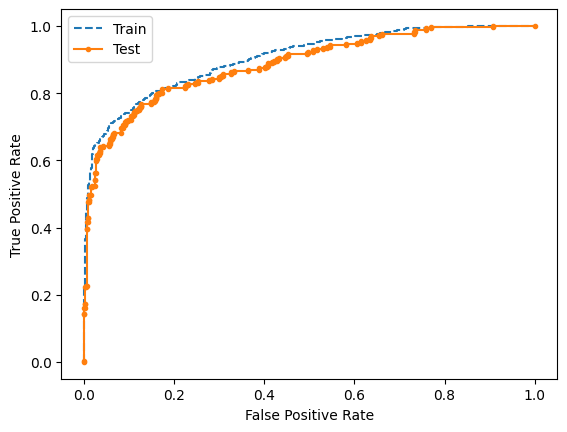

In [17]:
train_pred = model.predict_proba(X_train_normalized)[:, 1]
test_pred = model.predict_proba(X_test_normalized)[:, 1]

print(f"Train AUC: {metrics.roc_auc_score(y_train, train_pred):.3f}")
print(f"Test AUC: {metrics.roc_auc_score(y_test, test_pred):.3f}")

train_fpr, train_tpr, _ = metrics.roc_curve(y_train, train_pred)
test_fpr, test_tpr, _ = metrics.roc_curve(y_test, test_pred)

# plot the roc curve for the model
plt.plot(train_fpr, train_tpr, linestyle="--", label="Train")
plt.plot(test_fpr, test_tpr, marker=".", label="Test")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()

We can also look at threshold-based metrics. By selecting a decision threshold $t$, we predict all observations with a predicted probability $\hat{y} \geq t$ to have an elevator and all others to have no elevator. 

Let's calculate the training and testing accuracy for our model:

In [18]:
t = 0.5
print("Train Accuracy: %.3f" % metrics.accuracy_score(y_train, train_pred > t))
print("Test Accuracy: %.3f" % metrics.accuracy_score(y_test, test_pred > t))

# If we wanted to get all of the elements of the confusion matrix, we could pull them like this:
tn, fp, fn, tp = metrics.confusion_matrix(y_train, train_pred > t).ravel()

Train Accuracy: 0.893
Test Accuracy: 0.879


Note that when talking about accuracy, it is important to keep in mind the baseline accuracy. In this task, the training set has 607 / 2509 = 24.2% elevators. A naive baseline model would predict the most common class, "no elevators" for all observations. This would be correct 75.8\% of the time on the training set.

Before we move on, we'll wrap all of our evaluation steps into a function that we can use to evaluate other models in a consistent way.

In [19]:
def classification_evaluation(model, X_train, y_train, X_test, y_test, t=0.5):
    train_pred = model.predict_proba(X_train)[:, 1]
    test_pred = model.predict_proba(X_test)[:, 1]

    print("Train AUC: %.3f" % metrics.roc_auc_score(y_train, train_pred))
    print("Test AUC: %.3f" % metrics.roc_auc_score(y_test, test_pred))

    print("\nTrain Accuracy: %.3f" % metrics.accuracy_score(y_train, train_pred > t))
    print("Test Accuracy: %.3f" % metrics.accuracy_score(y_test, test_pred > t))

    train_fpr, train_tpr, _ = metrics.roc_curve(y_train, train_pred)
    test_fpr, test_tpr, _ = metrics.roc_curve(y_test, test_pred)

    # plot the roc curve for the model
    plt.plot(train_fpr, train_tpr, linestyle="--", label="Train")
    plt.plot(test_fpr, test_tpr, marker=".", label="Test")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.legend()
    plt.show()

Train AUC: 0.904
Test AUC: 0.887

Train Accuracy: 0.893
Test Accuracy: 0.879


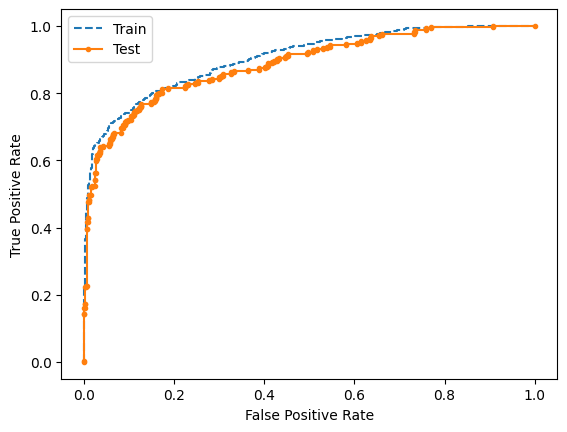

In [20]:
classification_evaluation(model, X_train_normalized, y_train, X_test_normalized, y_test)

As you can see, `sklearn.metrics` is versatile and allows you to calculate and plot a bunch of different performance metrics. 


# Conclusion

### Take-aways
We have covered examples of machine learning methods for regression and classification. This is just the tip of the iceberg. There are tons more machine learning methods which can be easily implemented in Python.  

We haven't focused that much on the feature preprocessing and data cleaning, but this is often one of the most important aspects. 

### Notes on sklearn modeling

- There are many, many classification algorithms implemented in `scikit-learn`. [Here's](https://scikit-learn.org/stable/auto_examples/classification/plot_classifier_comparison.html) an example that compares a broad set of methods, including SVM, k-Nearest Neighbors, and others.
- XGBoost and LightGBM follow nearly identical syntax. However, it is not implemented in scikit-learn. You have to install the [xgboost](https://xgboost.readthedocs.io/en/latest/) library and then adapt the code above to this model.